In [1]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [2]:
#read in data file and skip to data
file=open("/Users/Roslyn/Desktop/run-XXXII", "r")
#print(file.readline()) 

In [3]:
with file as f:
    lines_after_6 = f.readlines()[7:]

#print(lines_after_6[0])

In [4]:
#extract first two coloumns and convert to float
col1=[]
for x in lines_after_6:
    col1.append(float(x.split()[0]))
    
    
col2=[]
for x in lines_after_6:
    col2.append(float(x.split()[1]))

In [5]:
#combine real and imaginary parts to give list of complex data outputs
data=np.vectorize(complex)(col1, col2)
#print(data[0])
#print(len(data))

In [6]:
print(data[0])
print(data[1])
print(data[1]-data[0])

(-0.9734519-1.18327j)
(0.4169567-1.035656j)
(1.3904086+0.14761400000000013j)


In [7]:
#implement xzop=x(t+dt)-x(t)

xzop=[]

for i in range(0, 24088998):
    xzop.append(data[i+1]-data[i])

In [8]:
#check 
print(data[0])
print(data[1])
print(data[1]-data[0])
print(xzop[0])
print(data[500]-data[499])
print(xzop[499])

(-0.9734519-1.18327j)
(0.4169567-1.035656j)
(1.3904086+0.14761400000000013j)
(1.3904086+0.14761400000000013j)
(-1.4696948-2.2035749j)
(-1.4696948-2.2035749j)


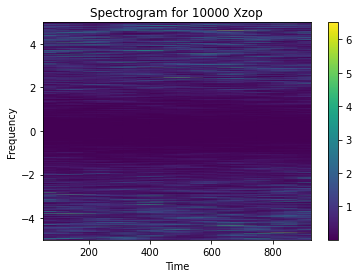

In [9]:
#spectrogram of differences for first 10000 of differences 
f, t, Sxx = signal.spectrogram(xzop[:10000]-np.mean(xzop[:10000]), 10, nperseg=1000, return_onesided=False)
plt.pcolormesh(t, fftshift(f), fftshift(Sxx, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spectrogram for 10000 Xzop')
plt.show()

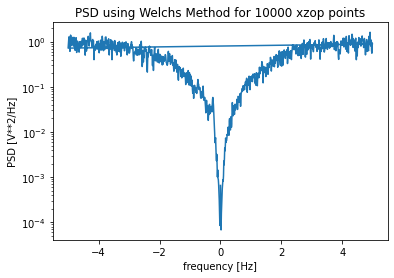

In [20]:
#PSD for 10000 points using welch's method 
fP, Pxx_den = signal.welch(xzop[:10000]-np.mean(xzop[:10000]), 10, nperseg=1000, return_onesided=False)
plt.semilogy(fP, Pxx_den)
plt.title('PSD using Welchs Method for 10000 xzop points')
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

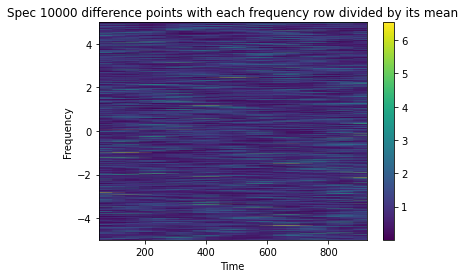

In [17]:
#dividing each freq row by average and plot this spectrogram 
normSxx=[]

for i in range(0,1000):
    normSxx.append(Sxx[i]/np.mean(Sxx[i]))
    
plt.pcolormesh(t, fftshift(f), fftshift(normSxx, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spec 10000 difference points with each frequency row divided by its mean')
plt.show()

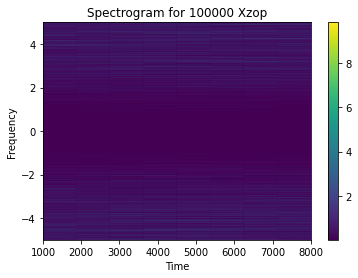

In [18]:
#spectrogram of differences for first 100000 of differences 
f100000, t100000, Sxx100000 = signal.spectrogram(xzop[:100000]-np.mean(xzop[:100000]), 10, nperseg=20000, return_onesided=False)
plt.pcolormesh(t100000, fftshift(f100000), fftshift(Sxx100000, axes=0), shading='gouraud')
plt.colorbar()
plt.ylabel('Frequency')
plt.xlabel('Time')
plt.title('Spectrogram for 100000 Xzop')
plt.show()